In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

Let's load the Nashville Business Improvement District Boundaries data and look at the first few rows

geopandas reads files with the read_file() method

The business data was downloaded from https://data.nashville.gov/General-Government/Business-Improvement-District-Boundaries-GIS-/peu8-zsat

In [2]:
business_improv = gpd.read_file('../Data/business_improvement_district_boundaries.geojson')
print(business_improv.crs)
business_improv.head()

epsg:4326


,area,name,shape_stle,modify_date,objectid,id,shape_star,ordinance,est_date,geometry
0,0.598798093482,Central Business Improvement District,20206.6011162,2017-03-08T00:00:00+00:00,2,0,16693465.9932,BL2017-580,1998-02-06T00:00:00+00:00,"MULTIPOLYGON (((-86.78557 36.15742, -86.78417 ..."
1,0.145317848102,Gulch Business Improvement District,0,2016-01-06T00:00:00+00:00,0,0,0,BL2015-67,2006-08-16T00:00:00+00:00,"MULTIPOLYGON (((-86.78457 36.15520, -86.78457 ..."


In [3]:
type(business_improv)

geopandas.geodataframe.GeoDataFrame

Note that if the crs contains init it needs to be updated as shown in the cell below

In [4]:
# business_improv.geometry.to_crs('EPSG:4326')
# print(business_imrpov.crs)

#### Now let's look at the difference between calling the first geometry variable.....


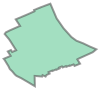

In [5]:
business_improv.loc[0, 'geometry']

#### ...and printing it


In [6]:
print(business_improv.loc[0, 'geometry'])

MULTIPOLYGON (((-86.78556828224605 36.15742349202315, -86.78416837601885 36.15801103368565, -86.78474871699042 36.15890091490335, -86.78411999277336 36.1591763151, -86.78394933155936 36.15890930892427, -86.7838760442809 36.15879468236198, -86.78307249166207 36.1591370159372, -86.78422165920674 36.16093865142265, -86.78448739272328 36.16133596256905, -86.78537081151327 36.1623977082226, -86.78513272153505 36.16272541773114, -86.78434356324522 36.16311857801987, -86.78245428112328 36.16395262661768, -86.78228230637696 36.16400619682027, -86.78315787631591 36.16532936313191, -86.78070980643865 36.16635934206258, -86.77940599146108 36.16694882711441, -86.77948901072972 36.16720650200664, -86.77798547648585 36.1678106851173, -86.77622367863492 36.16846896575727, -86.7749657500427 36.16552212097163, -86.77356619041494 36.16352034757094, -86.77201849725228 36.16179926246247, -86.7710031655436 36.16105036032884, -86.76965429173858 36.16052623217986, -86.76830426083974 36.15988101904475, -86.76

#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


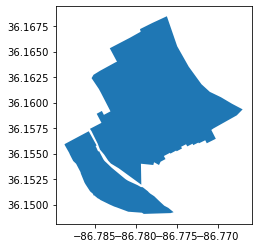

In [7]:
business_improv.plot();

#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by `matplotib`

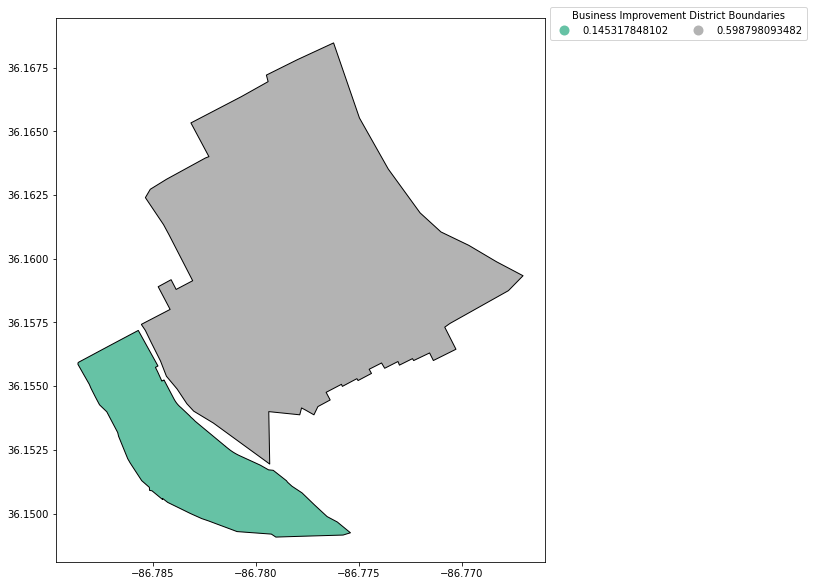

In [8]:
#geopandas handles legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Business Improvement District Boundaries', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

business_improv.plot(column = 'area', figsize =(10,10),
                    edgecolor = 'black',
                    legend = True, legend_kwds = leg_kwds,
                     cmap = 'Set2')
plt.show()

#### Next you will read in the building permits issued data
- downloaded from https://data.nashville.gov/Licenses-Permits/Building-Permits-Issued/3h5w-q8b7/data
- cleaned:
    - rename columns 
    - drop unwanted columns 
    - parse `lat` and `lng` columns from `location`
- print the shape 
- take a look at the first 3 rows

In [9]:
permits_issued = pd.read_csv('../Data/building_permits_issued.csv')
print(permits_issued.shape)
permits_issued.head(3)

(34193, 20)


C:\Users\rache\anaconda3\envs\geo\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location
0,2021027259,Building Residential Rehab Storm Damage,Single Family Residence,14710001600,04/30/2021,06/21/2021,"40,000.00",5045 SUTER DR,NASHVILLE,TN,37211.0,LOT 241 SEC 5 CALDWELL COUNTRY ESTATES,"ERT, LLC.",CARL,CAA01R301,3977347,to conduct general repairs to existing residen...,26.0,37018902.0,"5045 SUTER DR\nNASHVILLE, TN 37211\n(36.068916..."
1,2021021204,Building Residential - New,Single Family Residence,07112039200,04/07/2021,05/05/2021,"292,188.00",1807 JOY CIR,NASHVILLE,TN,3720.0,LOT 54 JOYWOOD SUB,HARP DEVELOPMENT LLC,CARN,CAA01R301,3963014,to construct a single family residence with 24...,5.0,37011300.0,"1807 JOY CIR\nNASHVILLE, TN 03720\n(36.202582,..."
2,2021028110,Building Commercial - Rehab,"Retail, Department / Retail Stores",11801004500,05/05/2021,06/21/2021,"234,501.00",2707 12TH AVE S,NASHVILLE,TN,37204.0,PT LOT 21 DR E.T. NOEL SUB,"DOWDLE CONSTRUCTION GROUP, LLC",CACR,CAF20M001,3979526,TO CONDUCT INTERIOR RENOVATIONS FOR NEW TENANT...,18.0,37016900.0,"2707 12TH AVE S\nNASHVILLE, TN 37204\n(36.1226..."


In [10]:
permits_issued.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34193 entries, 0 to 34192
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Permit #                    34193 non-null  object 
 1   Permit Type Description     34193 non-null  object 
 2   Permit Subtype Description  34193 non-null  object 
 3   Parcel                      34193 non-null  object 
 4   Date Entered                34193 non-null  object 
 5   Date Issued                 34193 non-null  object 
 6   Construction Cost           34192 non-null  object 
 7   Address                     34193 non-null  object 
 8   City                        34192 non-null  object 
 9   State                       34193 non-null  object 
 10  ZIP                         34192 non-null  float64
 11  Subdivision / Lot           34193 non-null  object 
 12  Contact                     34192 non-null  object 
 13  Permit Type                 341

In [11]:
permits_issued['Mapped Location']

0        5045 SUTER DR\nNASHVILLE, TN 37211\n(36.068916...
1        1807 JOY CIR\nNASHVILLE, TN 03720\n(36.202582,...
2        2707 12TH AVE S\nNASHVILLE, TN 37204\n(36.1226...
3        2760 MURFREESBORO PIKE 38-44\nANTIOCH, TN 3701...
4        1717 ELM HILL PIKE\nNASHVILLE, TN 37210\n(36.1...
                               ...                        
34188    1513 16TH AVE S\nNASHVILLE, TN 37212\n(36.1385...
34189    1825 PEARL ST\nNASHVILLE, TN 37203\n(36.158405...
34190    1611 MARTIN ST\nNASHVILLE, TN 37203\n(36.13666...
34191    805 DIVISION ST\nNASHVILLE, TN 37203\n(36.1499...
34192    1224 2ND AVE S 201\nNASHVILLE, TN 37210\n(36.1...
Name: Mapped Location, Length: 34193, dtype: object

In [12]:
lat_lng = permits_issued['Mapped Location'].str.split('(', expand = True)[1].str.replace(')', '').str.split(',', expand = True)


<ipython-input-12-c376d64cb376>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  lat_lng = permits_issued['Mapped Location'].str.split('(', expand = True)[1].str.replace(')', '').str.split(',', expand = True)


ASK -------- permits_issued['lat'] = lat_lng[0]

In [13]:
lat_lng.columns = ['lat', 'lng']

In [14]:
print(lat_lng)

             lat          lng
0      36.068916   -86.738966
1      36.202582   -86.760444
2      36.122666    -86.79007
3      36.068505   -86.632396
4      36.144956   -86.710069
...          ...          ...
34188  36.138594   -86.794052
34189  36.158405   -86.802933
34190  36.136665    -86.77001
34191  36.149927    -86.78043
34192  36.144111   -86.763638

[34193 rows x 2 columns]


In [15]:
permits_issued['lat'] = lat_lng['lat']

In [16]:
permits_issued['lng'] = lat_lng['lng']

In [17]:
lat_lng.head(3)

,lat,lng
0,36.068916,-86.738966
1,36.202582,-86.760444
2,36.122666,-86.79007


In [18]:
print(lat_lng.dtypes)

lat    object
lng    object
dtype: object


In [19]:
permits_issued.head()

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,...,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location,lat,lng
0,2021027259,Building Residential Rehab Storm Damage,Single Family Residence,14710001600,04/30/2021,06/21/2021,"40,000.00",5045 SUTER DR,NASHVILLE,TN,...,"ERT, LLC.",CARL,CAA01R301,3977347,to conduct general repairs to existing residen...,26.0,37018902.0,"5045 SUTER DR\nNASHVILLE, TN 37211\n(36.068916...",36.068916,-86.738966
1,2021021204,Building Residential - New,Single Family Residence,07112039200,04/07/2021,05/05/2021,"292,188.00",1807 JOY CIR,NASHVILLE,TN,...,HARP DEVELOPMENT LLC,CARN,CAA01R301,3963014,to construct a single family residence with 24...,5.0,37011300.0,"1807 JOY CIR\nNASHVILLE, TN 03720\n(36.202582,...",36.202582,-86.760444
2,2021028110,Building Commercial - Rehab,"Retail, Department / Retail Stores",11801004500,05/05/2021,06/21/2021,"234,501.00",2707 12TH AVE S,NASHVILLE,TN,...,"DOWDLE CONSTRUCTION GROUP, LLC",CACR,CAF20M001,3979526,TO CONDUCT INTERIOR RENOVATIONS FOR NEW TENANT...,18.0,37016900.0,"2707 12TH AVE S\nNASHVILLE, TN 37204\n(36.1226...",36.122666,-86.79007
3,2021024715,Building Residential - New,"Multifamily, Apt / Twnhome > 5 Unit Bldg",14900037300,04/21/2021,06/21/2021,"1,001,442.00",2760 MURFREESBORO PIKE 38-44,ANTIOCH,TN,...,BACAR CONSTRUCTORS INC,CARN,CAA03R399,3970804,To construct townhome units 38-44. 7 2 bedroo...,29.0,37015620.0,"2760 MURFREESBORO PIKE 38-44\nANTIOCH, TN 3701...",36.068505,-86.632396
4,2021027119,Building Sign Permit,Sign - Ground / Wall Signs,10701000100,04/30/2021,05/05/2021,"5,000.00",1717 ELM HILL PIKE,NASHVILLE,TN,...,BOOM SIGN AND LIGHTING,CASN,CAZ02A001,3976785,to erect 57SF illuminated monument sign for Th...,15.0,37019600.0,"1717 ELM HILL PIKE\nNASHVILLE, TN 37210\n(36.1...",36.144956,-86.710069


In [20]:
permits_issued.dtypes

Permit #                       object
Permit Type Description        object
Permit Subtype Description     object
Parcel                         object
Date Entered                   object
Date Issued                    object
Construction Cost              object
Address                        object
City                           object
State                          object
ZIP                           float64
Subdivision / Lot              object
Contact                        object
Permit Type                    object
Permit Subtype                 object
IVR Tracking #                  int64
Purpose                        object
Council District              float64
Census Tract                  float64
Mapped Location                object
lat                            object
lng                            object
dtype: object

In [21]:
permits_issued.lat = permits_issued.lat.astype(float)
permits_issued.lng = permits_issued.lng.astype(float)

#### In order to spatially join the permits with the business improvement, you will need to create a GeoDataFrame of permits
- First create a geometry column that is a `Point` datatype

In [22]:
permits_issued['geometry'] = permits_issued.apply(lambda x: Point((float(x.lng),
                                                                  float(x.lat))),
                                                 axis = 1)
permits_issued.head(3)

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,...,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location,lat,lng,geometry
0,2021027259,Building Residential Rehab Storm Damage,Single Family Residence,14710001600,04/30/2021,06/21/2021,"40,000.00",5045 SUTER DR,NASHVILLE,TN,...,CARL,CAA01R301,3977347,to conduct general repairs to existing residen...,26.0,37018902.0,"5045 SUTER DR\nNASHVILLE, TN 37211\n(36.068916...",36.068916,-86.738966,POINT (-86.738966 36.068916)
1,2021021204,Building Residential - New,Single Family Residence,07112039200,04/07/2021,05/05/2021,"292,188.00",1807 JOY CIR,NASHVILLE,TN,...,CARN,CAA01R301,3963014,to construct a single family residence with 24...,5.0,37011300.0,"1807 JOY CIR\nNASHVILLE, TN 03720\n(36.202582,...",36.202582,-86.760444,POINT (-86.76044400000001 36.202582)
2,2021028110,Building Commercial - Rehab,"Retail, Department / Retail Stores",11801004500,05/05/2021,06/21/2021,"234,501.00",2707 12TH AVE S,NASHVILLE,TN,...,CACR,CAF20M001,3979526,TO CONDUCT INTERIOR RENOVATIONS FOR NEW TENANT...,18.0,37016900.0,"2707 12TH AVE S\nNASHVILLE, TN 37204\n(36.1226...",36.122666,-86.790070,POINT (-86.79007 36.122666)


#### Now that the permits data has a geometry field, you can use it to build a GeoDataFrame
- you want the CRS for the permits to match the CRS in the business improvement GeoDataFrame 


In [23]:
business_improv.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry

In [24]:
permits_geo = gpd.GeoDataFrame(permits_issued,
                              crs = business_improv.crs,
                              geometry = permits_issued['geometry'])

In [25]:
type(permits_geo)

geopandas.geodataframe.GeoDataFrame

#### Now you are ready to combine permits and business improvement with a spatial join
- first a little clean up for the business improvement
    - just keep the area, name, and geometry columns
- then construct the join 
    - the geometry for the new (combined) GeoDataFrame comes from the left GeoDataFrame


In [26]:
business_improv = business_improv[['area', 'name', 'geometry']]

In [27]:
downtown_building_permits = gpd.sjoin(permits_geo, business_improv, op ='within')

In [28]:
downtown_building_permits.head()

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,...,Purpose,Council District,Census Tract,Mapped Location,lat,lng,geometry,index_right,area,name
43,2020036628,Building Commercial - Tenant Finish Out,Restaurant (Full Service),09313057800,06/15/2020,05/05/2021,"162,678.00",341 11TH AVE S,NASHVILLE,TN,...,Tenant build out of approximately 2800 sq.ft. ...,19.0,37019500.0,"341 11TH AVE S\nNASHVILLE, TN 37203\n(36.15235...",36.152353,-86.783851,POINT (-86.78385 36.15235),1,0.145317848102,Gulch Business Improvement District
87,2021013556,Building Sign Permit,Sign - Ground / Wall Signs,09313057800,03/08/2021,05/06/2021,"5,000.00",333 11TH AVE S,NASHVILLE,TN,...,SIGN PERMIT FOR� �THE MLC� �38� DIA ROUND BLAD...,19.0,37019500.0,"333 11TH AVE S\nNASHVILLE, TN 37203\n(36.15236...",36.152368,-86.783842,POINT (-86.78384 36.15237),1,0.145317848102,Gulch Business Improvement District
176,2021028003,Building Sign Permit,Sign - Ground / Wall Signs,09314056400,05/05/2021,05/07/2021,"24,871.00",908 DIVISION ST,NASHVILLE,TN,...,to erect signs as follows for Harlowe:\n\n1 - ...,19.0,37019500.0,"908 DIVISION ST\nNASHVILLE, TN 37203\n(36.1506...",36.150694,-86.781659,POINT (-86.78166 36.15069),1,0.145317848102,Gulch Business Improvement District
201,2021037191,Building Sign Permit,Sign - Ground / Wall Signs,093090E00100CO,06/14/2021,06/22/2021,"3,000.00",1222 DEMONBREUN ST 105,NASHVILLE,TN,...,DTC & MDHA to review/approve prior to permit i...,19.0,37019500.0,"1222 DEMONBREUN ST 105\nNASHVILLE, TN 37203\n(...",36.154516,-86.786637,POINT (-86.78664 36.15452),1,0.145317848102,Gulch Business Improvement District
484,2021026036,Building Commercial - Rehab,"General Office, Professional Services",09314056100,04/27/2021,05/14/2021,"50,000.00",907 GLEAVES ST 102,NASHVILLE,TN,...,to rehab an interior portion of existing non-r...,19.0,37019500.0,"907 GLEAVES ST 102\nNASHVILLE, TN 37203\n(36.1...",36.152058,-86.781811,POINT (-86.78181 36.15206),1,0.145317848102,Gulch Business Improvement District


In [29]:
gulch_permits = downtown_building_permits[downtown_building_permits.name == 'Gulch Business Improvement District']

In [30]:
gulch_permits.shape

(197, 26)

In [31]:
gulch_permits.head(10)

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,...,Purpose,Council District,Census Tract,Mapped Location,lat,lng,geometry,index_right,area,name
43,2020036628,Building Commercial - Tenant Finish Out,Restaurant (Full Service),09313057800,06/15/2020,05/05/2021,"162,678.00",341 11TH AVE S,NASHVILLE,TN,...,Tenant build out of approximately 2800 sq.ft. ...,19.0,37019500.0,"341 11TH AVE S\nNASHVILLE, TN 37203\n(36.15235...",36.152353,-86.783851,POINT (-86.78385 36.15235),1,0.145317848102,Gulch Business Improvement District
87,2021013556,Building Sign Permit,Sign - Ground / Wall Signs,09313057800,03/08/2021,05/06/2021,"5,000.00",333 11TH AVE S,NASHVILLE,TN,...,SIGN PERMIT FOR� �THE MLC� �38� DIA ROUND BLAD...,19.0,37019500.0,"333 11TH AVE S\nNASHVILLE, TN 37203\n(36.15236...",36.152368,-86.783842,POINT (-86.78384 36.15237),1,0.145317848102,Gulch Business Improvement District
176,2021028003,Building Sign Permit,Sign - Ground / Wall Signs,09314056400,05/05/2021,05/07/2021,"24,871.00",908 DIVISION ST,NASHVILLE,TN,...,to erect signs as follows for Harlowe:\n\n1 - ...,19.0,37019500.0,"908 DIVISION ST\nNASHVILLE, TN 37203\n(36.1506...",36.150694,-86.781659,POINT (-86.78166 36.15069),1,0.145317848102,Gulch Business Improvement District
201,2021037191,Building Sign Permit,Sign - Ground / Wall Signs,093090E00100CO,06/14/2021,06/22/2021,"3,000.00",1222 DEMONBREUN ST 105,NASHVILLE,TN,...,DTC & MDHA to review/approve prior to permit i...,19.0,37019500.0,"1222 DEMONBREUN ST 105\nNASHVILLE, TN 37203\n(...",36.154516,-86.786637,POINT (-86.78664 36.15452),1,0.145317848102,Gulch Business Improvement District
484,2021026036,Building Commercial - Rehab,"General Office, Professional Services",09314056100,04/27/2021,05/14/2021,"50,000.00",907 GLEAVES ST 102,NASHVILLE,TN,...,to rehab an interior portion of existing non-r...,19.0,37019500.0,"907 GLEAVES ST 102\nNASHVILLE, TN 37203\n(36.1...",36.152058,-86.781811,POINT (-86.78181 36.15206),1,0.145317848102,Gulch Business Improvement District
965,2021036033,Building Sign Permit,Sign - Ground / Wall Signs,09309030500,06/08/2021,06/09/2021,"2,100.00",1101 LAUREL ST,NASHVILLE,TN,...,to erect 105Sf non illuminated wall sign to ea...,19.0,37019500.0,"1101 LAUREL ST\nNASHVILLE, TN 37203\n(36.15396...",36.153963,-86.784658,POINT (-86.78466 36.15396),1,0.145317848102,Gulch Business Improvement District
1182,2021038914,Building Commercial - Tenant Finish Out,"Multifamily, Apt / Twnhome > 5 Unit Bldg",09314057100,06/21/2021,06/30/2021,1.00,810 DIVISION ST 901-933,NASHVILLE,TN,...,To finish out Level 9 . 33 Residential Units U...,19.0,37019500.0,"810 DIVISION ST 901-933\nNASHVILLE, TN 37203\n...",36.149934,-86.780443,POINT (-86.78044 36.14993),1,0.145317848102,Gulch Business Improvement District
1256,2021038900,Building Commercial - Tenant Finish Out,"Multifamily, Apt / Twnhome > 5 Unit Bldg",09314057100,06/21/2021,06/30/2021,1.00,810 DIVISION ST 617,NASHVILLE,TN,...,To finish out Level 6 Amenity space with a clu...,19.0,37019500.0,"810 DIVISION ST 617\nNASHVILLE, TN 37203\n(36....",36.149934,-86.780443,POINT (-86.78044 36.14993),1,0.145317848102,Gulch Business Improvement District
1258,2021038888,Building Commercial - Tenant Finish Out,"General Office, Professional Services",09314057100,06/21/2021,06/30/2021,1.00,810 DIVISION ST 100,NASHVILLE,TN,...,To finish out Level 1 and 1M Leasing Office an...,19.0,37019500.0,"810 DIVISION ST 100\nNASHVILLE, TN 37203\n(36....",36.149934,-86.780443,POINT (-86.78044 36.14993),1,0.145317848102,Gulch Business Improvement District
1259,2021038907,Building Commercial - Tenant Finish Out,"Multifamily, Apt / Twnhome > 5 Unit Bldg",09314057100,06/21/2021,06/30/2021,1.00,810 DIVISION ST 623-633,NASHVILLE,TN,...,To finish out Level 6 . 11 Residential Units U...,19.0,37019500.0,"810 DIVISION ST 623-633\nNASHVILLE, TN 37203\n...",36.149934,-86.780443,POINT (-86.78044 36.14993),1,0.145317848102,Gulch Business Imp

In [32]:
gulch_permits = gulch_permits[['Permit Type Description', 'Permit Subtype Description', 'Address', 'Construction Cost', 'Date Issued', 'geometry', 'lat', 'lng']]

In [33]:
gulch_permits.head(10)

,Permit Type Description,Permit Subtype Description,Address,Construction Cost,Date Issued,geometry,lat,lng
43,Building Commercial - Tenant Finish Out,Restaurant (Full Service),341 11TH AVE S,"162,678.00",05/05/2021,POINT (-86.78385 36.15235),36.152353,-86.783851
87,Building Sign Permit,Sign - Ground / Wall Signs,333 11TH AVE S,"5,000.00",05/06/2021,POINT (-86.78384 36.15237),36.152368,-86.783842
176,Building Sign Permit,Sign - Ground / Wall Signs,908 DIVISION ST,"24,871.00",05/07/2021,POINT (-86.78166 36.15069),36.150694,-86.781659
201,Building Sign Permit,Sign - Ground / Wall Signs,1222 DEMONBREUN ST 105,"3,000.00",06/22/2021,POINT (-86.78664 36.15452),36.154516,-86.786637
484,Building Commercial - Rehab,"General Office, Professional Services",907 GLEAVES ST 102,"50,000.00",05/14/2021,POINT (-86.78181 36.15206),36.152058,-86.781811
965,Building Sign Permit,Sign - Ground / Wall Signs,1101 LAUREL ST,"2,100.00",06/09/2021,POINT (-86.78466 36.15396),36.153963,-86.784658
1182,Building Commercial - Tenant Finish Out,"Multifamily, Apt / Twnhome > 5 Unit Bldg",810 DIVISION ST 901-933,1.00,06/30/2021,POINT (-86.78044 36.14993),36.149934,-86.780443
1256,Building Commercial - Tenant Finish Out,"Multifamily, Apt / Twnhome > 5 Unit Bldg",810 DIVISION ST 617,1.00,06/30/2021,POINT (-86.78044 36.14993),36.149934,-86.780443
1258,Building Commercial - Tenant Finish Out,"General Office, Professional Services",810 DIVISION ST 100,1.00,06/30/2021,POINT (-86.78044 36.14993),36.149934,-86.780443
1259,Building Commercial - Tenant Finish Out,"Multifamily, Apt / Twnhome > 5 Unit Bldg",810 DIVISION ST 623-633,1.00,06/30/2021,POINT (-86.78044 36.14993),36.149934,-86.780443


In [34]:
zipcodes = gpd.read_file('../Data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head()

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


Join gulch_permits with zipcodes

In [35]:
gulch_permit_zip = gpd.sjoin(gulch_permits, zipcodes, op = 'within')

In [36]:
gulch_permit_zip.head()

,Permit Type Description,Permit Subtype Description,Address,Construction Cost,Date Issued,geometry,lat,lng,index_right,zip,objectid,po_name,shape_stlength,shape_starea
43,Building Commercial - Tenant Finish Out,Restaurant (Full Service),341 11TH AVE S,"162,678.00",05/05/2021,POINT (-86.78385 36.15235),36.152353,-86.783851,35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875
87,Building Sign Permit,Sign - Ground / Wall Signs,333 11TH AVE S,"5,000.00",05/06/2021,POINT (-86.78384 36.15237),36.152368,-86.783842,35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875
176,Building Sign Permit,Sign - Ground / Wall Signs,908 DIVISION ST,"24,871.00",05/07/2021,POINT (-86.78166 36.15069),36.150694,-86.781659,35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875
201,Building Sign Permit,Sign - Ground / Wall Signs,1222 DEMONBREUN ST 105,"3,000.00",06/22/2021,POINT (-86.78664 36.15452),36.154516,-86.786637,35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875
484,Building Commercial - Rehab,"General Office, Professional Services",907 GLEAVES ST 102,"50,000.00",05/14/2021,POINT (-86.78181 36.15206),36.152058,-86.781811,35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875


#### Let's take a closer look at the permits in the 37203 zip code
- filter the gulch_permits data to just get bus stops in 37203
- filter the zip code geodataframe to just the polygon (row) for 37203


In [37]:
permits_in_37203 = gulch_permit_zip.loc[gulch_permit_zip['zip'] == '37203']
permits_in_37203.shape

(197, 14)

In [38]:
permits_in_37203.head()

,Permit Type Description,Permit Subtype Description,Address,Construction Cost,Date Issued,geometry,lat,lng,index_right,zip,objectid,po_name,shape_stlength,shape_starea
43,Building Commercial - Tenant Finish Out,Restaurant (Full Service),341 11TH AVE S,"162,678.00",05/05/2021,POINT (-86.78385 36.15235),36.152353,-86.783851,35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875
87,Building Sign Permit,Sign - Ground / Wall Signs,333 11TH AVE S,"5,000.00",05/06/2021,POINT (-86.78384 36.15237),36.152368,-86.783842,35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875
176,Building Sign Permit,Sign - Ground / Wall Signs,908 DIVISION ST,"24,871.00",05/07/2021,POINT (-86.78166 36.15069),36.150694,-86.781659,35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875
201,Building Sign Permit,Sign - Ground / Wall Signs,1222 DEMONBREUN ST 105,"3,000.00",06/22/2021,POINT (-86.78664 36.15452),36.154516,-86.786637,35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875
484,Building Commercial - Rehab,"General Office, Professional Services",907 GLEAVES ST 102,"50,000.00",05/14/2021,POINT (-86.78181 36.15206),36.152058,-86.781811,35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875


In [39]:
polygon37203 = zipcodes.loc[zipcodes['zip'] == '37203']

In [40]:
polygon37203.shape

(1, 6)

#### Now plot these two together
- first plot the polygons for 37203 and make them light green
- next plot the points for the bus stops and color them by route

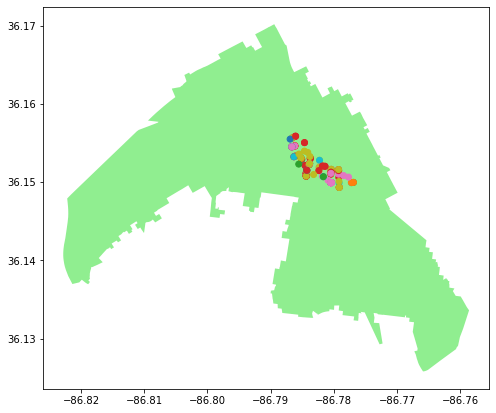

In [41]:
#fig, ax = matplotlib.subplots()
ax = polygon37203.plot(figsize = (8, 10), color = 'lightgreen')
permits_in_37203.plot(ax = ax, column = 'Permit Type Description');
plt.show();

#### We're getting there! It would be helpful to have streets, though wouldn't it? We can add a street map with the folium package.


#### folium maps require a center point for the street map. 
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon
- Since there are two polygons which should we use?

In [42]:
polygon37203.geometry.centroid

<ipython-input-42-4e02f24b60de>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37203.geometry.centroid


35    POINT (-86.78899 36.14860)
dtype: geometry

In [43]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37203.geometry.centroid[35]
print(center)

POINT (-86.78898899667411 36.14860232841574)


<ipython-input-43-721b089a11c1>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37203.geometry.centroid[35]


#### Folium requires a location point as an array 
- with *latitude* first
- but shapely Points have *longitude* first 

In [44]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.14860232841574, -86.7889889966741]


#### To create a folium map just call the folium `Map()` constructor
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [45]:
#create our map of The Gulch Permits by Zipcode 37203 and show it
map_37203 = folium.Map(location = area_center, zoom_start = 12)
map_37203

#### Next, let's add our 37203 polygon and columns stop markers.


#### `itterows()` is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values. 
- Below, we are printing the row values for the first 3 row as we iterate through the GeoDataFrame of bus stops in 37203. 
- This idea will be helpful for creating our markers!

In [46]:
i = 0
for row_index, row_values in permits_in_37203.iterrows():
    if i <3:
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 43
values are:
 
Permit Type Description       Building Commercial - Tenant Finish Out
Permit Subtype Description                  Restaurant (Full Service)
Address                                               341  11TH AVE S
Construction Cost                                          162,678.00
Date Issued                                                05/05/2021
geometry                                 POINT (-86.783851 36.152353)
lat                                                         36.152353
lng                                                        -86.783851
index_right                                                        35
zip                                                             37203
objectid                                                           33
po_name                                                     NASHVILLE
shape_stlength                                     91285.438580354588
shape_starea                                        120649702.55

#### Create map_37203 again with additional features:
- add the zipcode area outline (polygon_37203)
- iterate through the permits_in_37293 to
    - create location from each lat and lng
    - create a popup from the stop column
    - build a marker from each location and popup
    - add the marker to  `map_37203`
- display `map_37203`

In [47]:
#draw out zip code area: 37203
map_37203 = folium.Map(location = area_center, zoom_start = 12)

folium.GeoJson(polygon37203).add_to(map_37203)

#iterate through permits_in_37203 to create locations and markers
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in permits_in_37203.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['Permit Type Description'] + '\n' + row_values['Permit Subtype Description'] + '\n' + row_values['Address'] + '\n' + row_values['Date Issued'] + '\n' + '$' + row_values['Construction Cost'])
    icon=folium.Icon(color="blue", icon="building", prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop, icon = icon)
    
    marker.add_to(map_37203)
map_37203.save('../maps/map37203.html')

#display our map
map_37203

#### If you have a lot of markers, you might want to use marker clusters
- Folium has `MarkerCluster()` and `FastMarkerCluster()`
- Construct a `MarkerCluster()` 
    - construct a `MarkerCluster()` and `.add_to()` the map
    - when you loop through the data and create markers add those to the marker cluster
- Construct a `FastMarkerCluster()` by passing a list of locations

#### You can save your map as an html file and it will retain the interactive qualities

In [48]:
folium.Map?

In [49]:
cluster_map_37203 = folium.Map(location = area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37203)

folium.GeoJson(polygon37203).add_to(cluster_map_37203)

# inside the loop add each marker to the cluster
for row_index, row_values in permits_in_37203.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['Permit Type Description'] + '\n' + row_values['Permit Subtype Description'] + '\n' + row_values['Address'] + '\n' + row_values['Date Issued'] + '\n' + '$' + row_values['Construction Cost'])
    icon = folium.Icon(color="blue", icon="building", prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop,
    icon = icon)
    
    marker.add_to(marker_cluster)
    
#save an interactive HTML map by calling .save()
cluster_map_37203.save('../maps/cluster37203.html')

cluster_map_37203

In [50]:
#draw our zip code area: 37203 
map_37203 = folium.Map(location = area_center, zoom_start = 12)

folium.GeoJson(polygon37203).add_to(map_37203)

#create a list of locations and pass them to FastMarkerCluster()
locations = permits_in_37203[['lat', 'lng']].values.tolist()
map_37203.add_child(
    FastMarkerCluster(locations)
)


#display our map
map_37203